In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qg-jets-shuffled/QG_jets_1.npz
/kaggle/input/qg-jets-shuffled/QG_jets_10.npz


# Understanding the Physics of Gluons and Quarks

I will start with the definition of the only word I know, jets. A "jet" is a "narrow cone of hadrons and other particles produced by the hadronization of quarks and gluons in a particle physics or heavy ion experiment." (sourced from wikipedia).

A hadron is a particle that is made up of two or more quarks and held together by forces of attration, e.g. protons and neutrons

Now it is not always possible to produce a jet, but if it is possible to produce a jet of particles according to laws of kinematics, it is called a 'kinematically realizable jet'. Such a jet is originated from a single quark and its associated gluon radiation, which is produced when a quark is formed due to high-energy collision. 

Quarks and gluons cannot exist freely, so when they are produced in high-energy collisions, they immediately fragment into hadrons, which are the particles we actually observe in detectors, obscuring their original identity as quarks or gluons.

To study kinematically realizable quark jets, physicists often use sophisticated Monte Carlo event generators like Pythia, which simulate the entire collision process, including quark production, gluon radiation, and hadronization.

Physically, kinematically realizable jets can be produced by any of the six quark types, but for this notebook, I have used the dataset which doesn't contain charm and bottom quarks. 

# Underatanding the dataset

This dataset is a compressed NumPy format. There are two arrays in this file

* X: (100000,M,4), exactly 50k quark and 50k gluon jets, randomly sorted, where M is the max multiplicity of the jets in that file (other jets have been padded with zero-particles), and the features of each particle are its pt, rapidity, azimuthal angle, and pdgid.
* y: (100000,), an array of labels for the jets where gluon is 0 and quark is 1.

Generation parameters are listed below:
* Pythia 8.226 
* Quarks from WeakBosonAndParton:qg2gmZq, gluons from WeakBosonAndParton:qqbar2gmZg with the Z decaying to neutrinos
* FastJet 3.3.0, anti-ki jets with R=0.4

Studying the features:

* pt or Transverse momentum: the component of a particle's momentum perpendicular to the beam axis. Gluon jets tend to emit particles with lower pt and vice versa for quark jets
* Rapidity: measure of the particle's velocity and angle relative to the beam axis. It is commonly used in high-energy physics to describe particle distributions along the collision axis. particles in gluon jets tend to have a wider spread in rapidity, while particles in quark jets tend to cluster together.
* Azimuthal angle: the angle of a particle in the transverse plane (perpendicular to the beam axis). It describes the spatial distribution of particles around the jet's axis. Gluons tend to be isotropically distributed whereas quarks tend to be anisotropically distributed
* Particle Data Group (PDG) ID: a unique identifier for particle types, such as pions, kaons, or protons. Gluons tend to produce larger variety of particles than quarks.

In [2]:
# load the dataset keeping in mind it is a NumPy array, not the usual .csv
data = np.load("/kaggle/input/qg-jets-shuffled/QG_jets_1.npz")
data

NpzFile '/kaggle/input/qg-jets-shuffled/QG_jets_1.npz' with keys: X, y

A look at the shapes of X and y gives us the idea of the size of data we're dealing with

In [3]:
X = data['X']
y = data['y']

print(X.shape, y.shape)

(100000, 134, 4) (100000,)


Let us take a look at any given jet and its type to see what kind of values of we'll be dealing with

In [4]:
X[0]

array([[ 6.21580243e-01, -8.49013586e-01,  5.02133119e+00,
        -2.11000000e+02],
       [ 6.41751806e-01, -1.25072426e+00,  5.44050034e+00,
         2.11000000e+02],
       [ 2.01318448e-01, -9.03872384e-01,  4.90318847e+00,
         2.20000000e+01],
       [ 2.12267880e-01, -1.53007561e+00,  5.25772266e+00,
        -2.11000000e+02],
       [ 1.15715993e-01, -1.21637938e+00,  4.72293956e+00,
         2.20000000e+01],
       [ 1.74847256e+00, -9.77056889e-01,  5.22212920e+00,
         2.20000000e+01],
       [ 1.62771810e+01, -1.04474590e+00,  5.24203347e+00,
         1.30000000e+02],
       [ 4.66200635e-01, -9.77083045e-01,  5.04801498e+00,
        -3.21000000e+02],
       [ 1.76574942e+00, -1.41171296e+00,  5.27212383e+00,
         2.20000000e+01],
       [ 1.60427641e+01, -1.02307416e+00,  5.18584440e+00,
         1.30000000e+02],
       [ 8.43750731e-01, -1.15072338e+00,  4.81019245e+00,
         2.20000000e+01],
       [ 1.19469680e+00, -1.06862571e+00,  5.24033426e+00,
      

In [5]:
y[0]

0.0

# Exploratory data Analysis

Text(0.5, 1.0, 'jet count (0 = Gluon, 1 = Quark)')

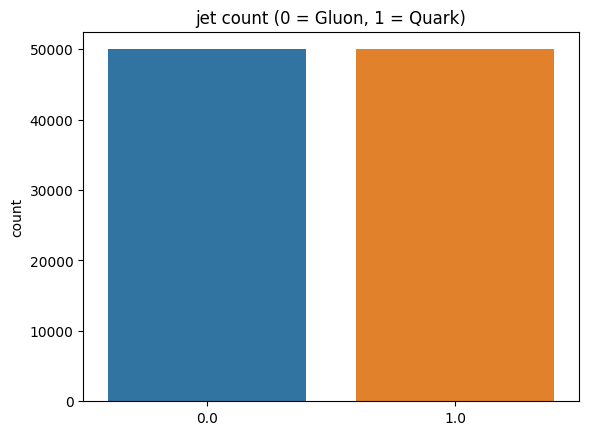

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#check the frequency of the datatypes
sns.countplot(x=y)
plt.title("jet count (0 = Gluon, 1 = Quark)")

Let us try to study the features of the first particle of each jet. Thus we set the second order of the array to be zero, and iterate through the dataset analyzing the features and comparing them with other jets

## Analyzing the features of the first particle of all jets

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'transverse momentum pt')

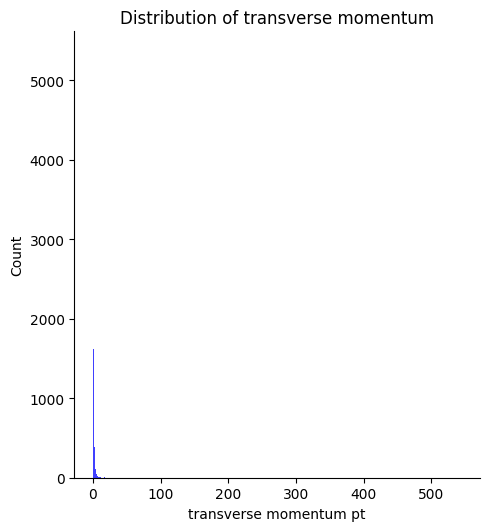

In [7]:
first_particle_pt = X[:, 0, 0]
sns.displot(first_particle_pt, color='blue')
plt.title("Distribution of transverse momentum")
plt.xlabel("transverse momentum pt")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Rapidity')

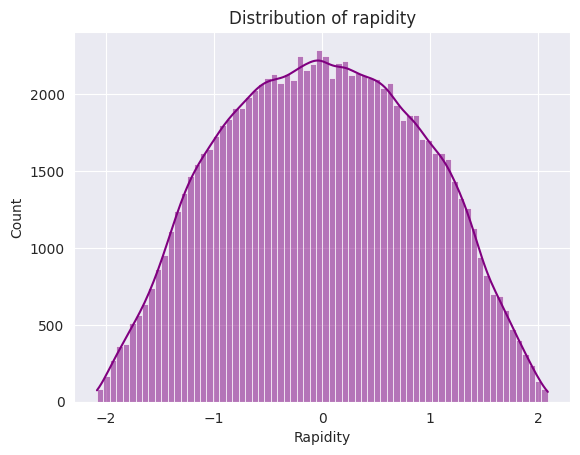

In [8]:
first_particle_rapidity = X[:, 0, 1]
sns.set_style("darkgrid")
sns.histplot(first_particle_rapidity, color="purple", kde=True)
plt.title("Distribution of rapidity")
plt.xlabel("Rapidity")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Azimuthal angle')

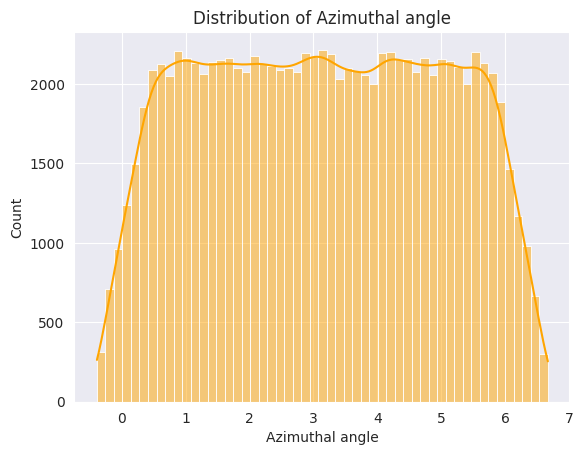

In [9]:
first_particle_angle = X[:, 0, 2]
sns.histplot(first_particle_angle, color="orange", kde=True)
plt.title("Distribution of Azimuthal angle")
plt.xlabel("Azimuthal angle")

## Analyzing features of all particles in each jet

In [10]:
#compute jet level statistics
avg_pt_per_jet = X[:, :, 0].mean(axis=1)
std_pt_per_jet = X[:, :, 0].std(axis=1) 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Average pt')

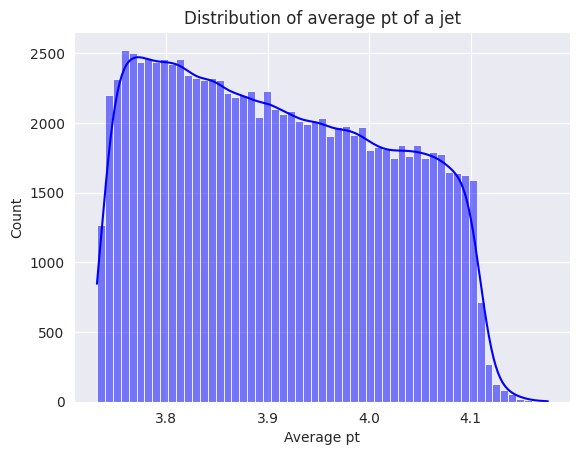

In [11]:
sns.histplot(avg_pt_per_jet, color='blue', kde=True)
plt.title("Distribution of average pt of a jet")
plt.xlabel("Average pt")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'standard deviation of pt')

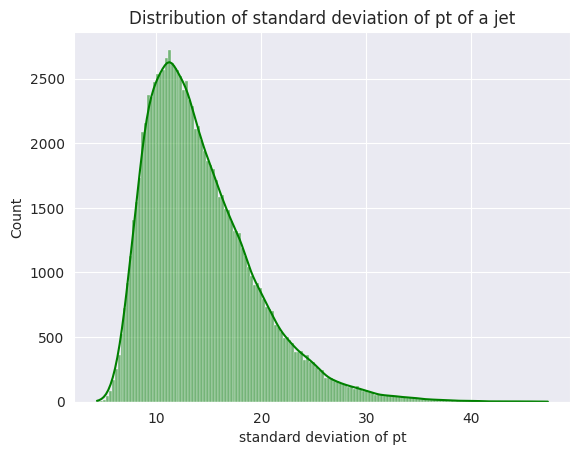

In [12]:
sns.histplot(std_pt_per_jet, color='green', kde=True)
plt.title("Distribution of standard deviation of pt of a jet")
plt.xlabel("standard deviation of pt")

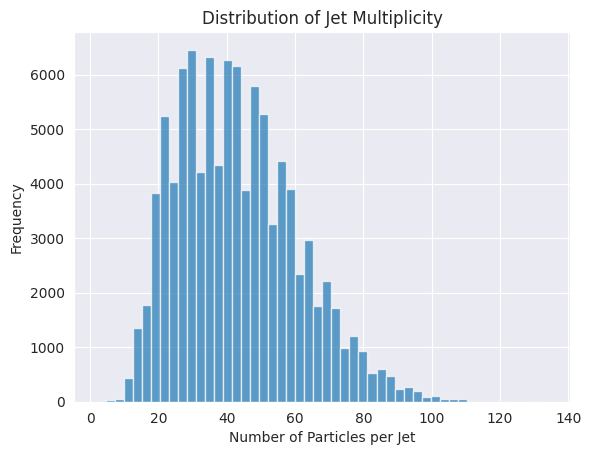

In [13]:
# comparing multiplicity of quarks and gluons separately
multiplicity = np.sum(X[:, :, 0] != 0, axis=1)  # Count non-zero particles in each jet

plt.hist(multiplicity, bins=50, alpha=0.7)
plt.title('Distribution of Jet Multiplicity')
plt.xlabel('Number of Particles per Jet')
plt.ylabel('Frequency')
plt.show()


## Comparing features across jet types

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


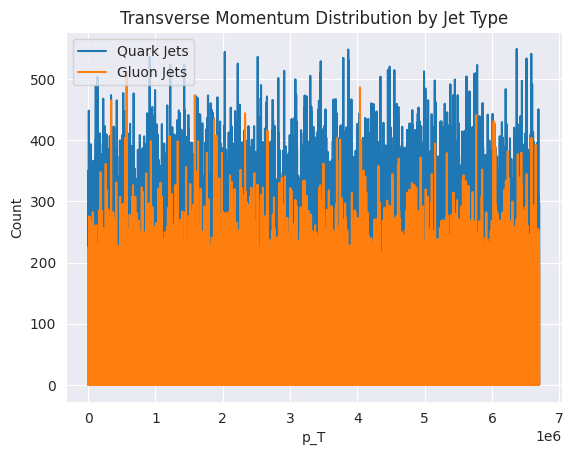

In [14]:
gluon_jets = X[y==0]
quark_jets = X[y==1]

plt.plot(quark_jets[:, :, 0].flatten(), label='Quark Jets')
plt.plot(gluon_jets[:, :, 0].flatten(), label='Gluon Jets')
plt.title('Transverse Momentum Distribution by Jet Type')
plt.xlabel('p_T')
plt.ylabel('Count')
plt.legend()

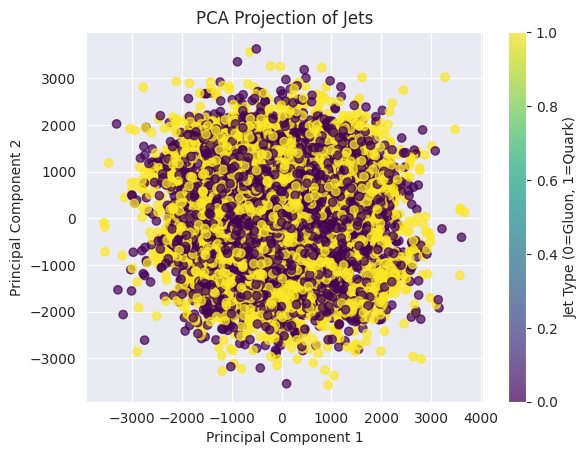

In [15]:
#this part is AI generated + modified

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

flattened_X = X.reshape(X.shape[0], -1)  # Shape: (num_samples, max_multiplicity * num_features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(flattened_X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA Projection of Jets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Jet Type (0=Gluon, 1=Quark)')
plt.show()


## Feature correlation

In [16]:
import pandas as pd

#convert each particle into its own identity as gluon or quark
#converting to DataFrame 

X_reshaped = X.reshape(-1, X.shape[2])

#adjusting the y labels accordingly

#this reshaping and DataFrame conversion needed AI help
y_adjusted = np.repeat(y, X.shape[1])

df = pd.DataFrame(X_reshaped, columns=['pt', 'rapidity', 'azimuthal_angle', 'PDG_ID'])
df['QG'] = y_adjusted 

Text(0.5, 1.0, 'feature correlation')

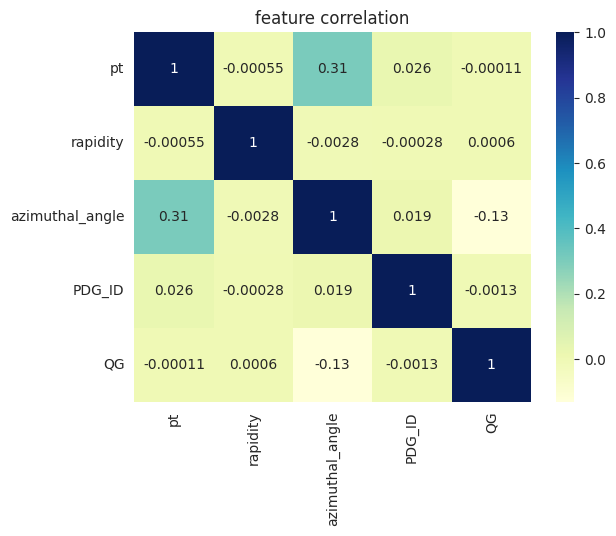

In [17]:
feature_correlation = df.corr()
sns.heatmap(feature_correlation, annot=True, cmap='YlGnBu')
plt.title("feature correlation")

# Building two models for prediction 

To classify the jets as either quark or gluon jets we can use classification algorithms like Logistic Regression, Random Forest Classifier or use Deep Learning Algorithms

## Data preprocessing 

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Flatten particle-level data for traditional ML models
X_flattened = X.reshape(X.shape[0], -1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Random Forest Classifier

Random Forest Classifier present advantages over other traditional models because 

1. Gives higher accuracy than other trees
2. handles large datasets effectively
3. Due to ensemble approach, it is resistant to outliers
4. It also effectively handles missing values

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate
y_prediction = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_prediction))
print("Classification Report:\n", classification_report(y_test, y_prediction))


Accuracy: 0.7799
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.82      0.79     10008
         1.0       0.81      0.74      0.77      9992

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

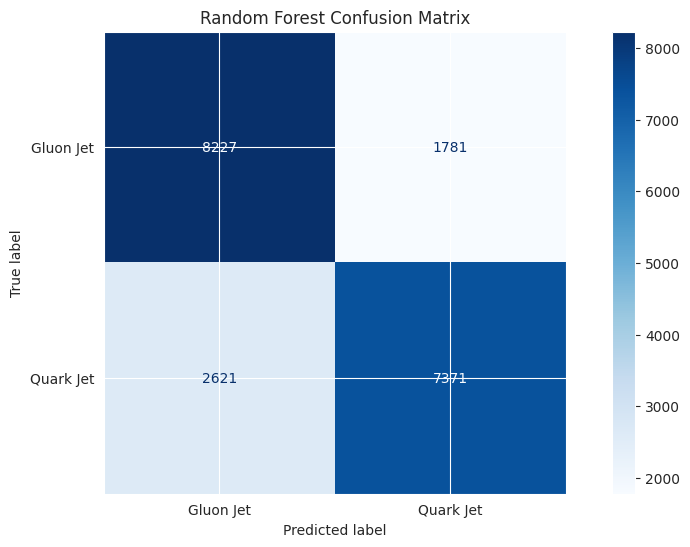

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Display Confusion Matrix for Random Forest Classifier
plt.figure(figsize=(12, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_prediction), display_labels=["Gluon Jet", "Quark Jet"]).plot(ax=plt.gca(), cmap="Blues")
plt.title("Random Forest Confusion Matrix")

## LSTM network 

LSTM networks have advantages over other traditional neural networks because it can learn from the sequence of the data, and in our dataset, the sequence of the data COULD matter, thus LSTM is preffered over networks such as CNN or RNN.

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

max_multiplicity = X.shape[1]  # Assuming this is consistent. Adjust if not.
num_features = X.shape[2]  # Number of features per particle

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# Build the deep learning model
model = Sequential([
    LSTM(64, input_shape=(max_multiplicity, num_features), return_sequences=True),  # First LSTM layer
    Dropout(0.3),  
    LSTM(32),  
    Dense(16, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

# train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=10,  
    batch_size=32,  
    verbose=2
)

# evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# display the results
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Gluon Jet", "Quark Jet"]))


Train shape: (80000, 134, 4)
Test shape: (20000, 134, 4)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 134, 64)             │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 134, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
2000/2000 - 26s - 13ms/step - accuracy: 0.7610 - loss: 0.4974 - val_accuracy: 0.7750 - val_loss: 0.4806
Epoch 2/10
2000/2000 - 21s - 11ms/step - accuracy: 0.7755 - loss: 0.4787 - val_accuracy: 0.7791 - val_loss: 0.4776
Epoch 3/10
2000/2000 - 21s - 11ms/step - accuracy: 0.7778 - loss: 0.4760 - val_accuracy: 0.7786 - val_loss: 0.4734
Epoch 4/10
2000/2000 - 21s - 11ms/step - accuracy: 0.7776 - loss: 0.4747 - val_accuracy: 0.7716 - val_loss: 0.4778
Epoch 5/10
2000/2000 - 21s - 11ms/step - accuracy: 0.7811 - loss: 0.4728 - val_accuracy: 0.7791 - val_loss: 0.4716
Epoch 6/10
2000/2000 - 21s - 11ms/step - accuracy: 0.7801 - loss: 0.4717 - val_accuracy: 0.7838 - val_loss: 0.4711
Epoch 7/10
2000/2000 - 21s - 11ms/step - accuracy: 0.7808 - loss: 0.4702 - val_accuracy: 0.7806 - val_loss: 0.4671
Epoch 8/10
2000/2000 - 21s - 11ms/step - accuracy: 0.7830 - loss: 0.4672 - val_accuracy: 0.7822 - val_loss: 0.4669
Epoch 9/10
2000/2000 - 21s - 11ms/step - accuracy: 0.7835 - loss: 0.4643 - 

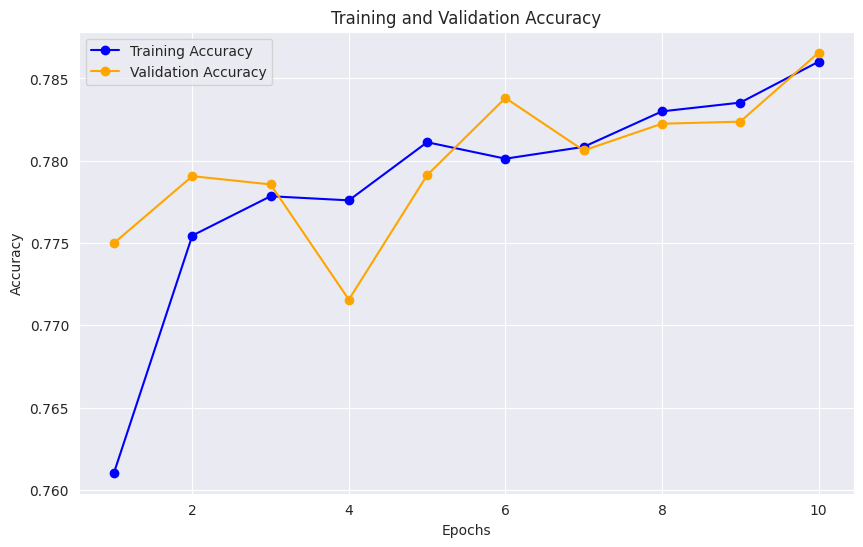

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

# Plot accuracy and val accuracy (AI generated plot)
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Text(0.5, 1.0, 'Deep Learning Confusion Matrix')

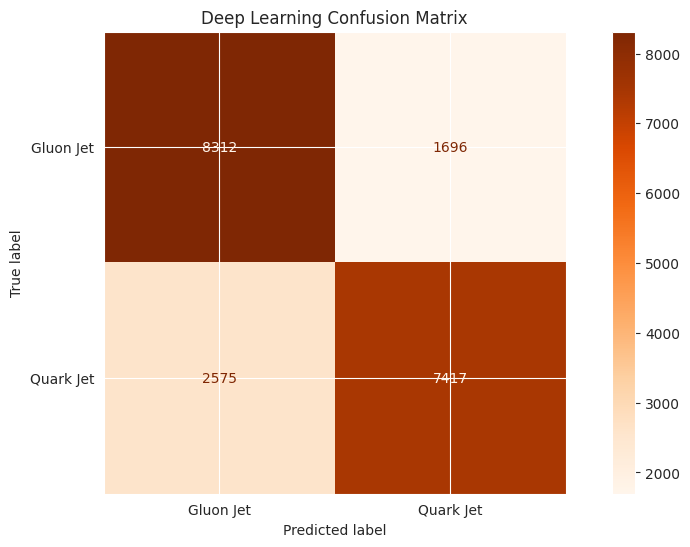

In [23]:
# Display confusion matrix for LSTM network

plt.figure(figsize=(12,6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=["Gluon Jet", "Quark Jet"]).plot(ax=plt.gca(), cmap="Oranges")
plt.title("Deep Learning Confusion Matrix")

Note: I do not have the knowledge of fine-tuning so I am leaving these models as is, and the dataset is also small, so I believe the accuracy can be taken upto 85%

# Conclusion

Two models for classifying jet types made successfully with accuracy of around 80%